 <h1> <center> <font color="grey"> Bike Sharing Case Study  </font></center></h1>
    

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 <h1> <center> <font color = "orange"> [Problem Statement]   <br><font color="grey"> </font></center></h1>
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
<font color = "orange">A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.</font><br>


    
<font color = "orange">Essentially the company wants :

- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
- To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
- To know the accuracy of the model, i.e. How well those variables describe the bike demands

The Attribut [click here](https://github.com/shubhamchaudhari389/BoomBikes-bike-sharing-assignment/blob/master/Readme.txt).

Business Goals :<br>


You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 
    
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------<br></font>
 In These problem statement for building a multiple linear regression model to predict the demand for shared bikes. To tackle this assignment, you can follow these general steps in your Jupyter notebook:

**1. Data Preparation:**
   - Load the dataset.
   - Check for missing values and handle them if necessary.
   - Convert numeric categorical variables (e.g., 'weathersit' and 'season') into categorical strings.
   - Explore the dataset and understand the data using summary statistics and visualizations.
   - Consider the 'yr' column as it might be valuable for prediction.

**2. Exploratory Data Analysis (EDA):**
   - Perform EDA to understand the relationships between different features and the target variable 'cnt'.
   - Visualize the data to identify patterns and correlations.

**3. Feature Selection:**
   - Identify significant variables that affect the demand for shared bikes.
   - You can use statistical tests or feature importance techniques to make this selection.

**4. Model Building:**
   - Split the dataset into training and testing sets.
   - Build a multiple linear regression model using the selected features with 'cnt' as the target variable.
   - Train the model on the training data.

**5. Residual Analysis:**
   - Analyze the residuals to check for any patterns or heteroscedasticity.
   - Ensure that the assumptions of linear regression are met.

**6. Model Evaluation:**
   - Make predictions on the test set.
   - Calculate the R-squared score on the test set using the provided code.
   - Interpret the R-squared score to evaluate the model's performance.

**7. Conclusion and Recommendations:**
   - Summarize your findings and the model's performance.
   - Provide recommendations to BoomBikes based on the insights gained from the model.

Make sure to document each step in your Jupyter notebook with clear explanations and code comments. Additionally, you may want to perform feature scaling or normalization if required, and consider using regularization techniques like Lasso or Ridge regression if you encounter issues with overfitting.

Remember to adapt the variable names in the provided code snippet for calculating the R-squared score to match your variable names used in the notebook.

If you have any specific questions or need further assistance with any step of the process, please feel free to ask.   
    
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 <h1> <center> <font color = "orange"> Step 1 : Reading and Understand the Data <br><font color="grey"> </font></center></h1>

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 <h5> <font color = "orange"> Reading The Bike Shearing Dataset <br><font color="grey"> </font></h5>

In [1]:
# Supress Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd

In [3]:
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 <h5> <font color = "orange"> Inspecting The Dataset <br><font color="grey"> </font></h5>

In [4]:
bike_df.shape

(730, 16)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### <font color = 'red'>Inferences:</font>
 <h5> <font color = "White">In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purposes.<br><font color="grey"> </font></h5>

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 <h1> <center> <font color = "orange"> Step 2 : Exploratory Data Analysis <br><font color="grey"> </font></center></h1>

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 <h5> <font color = "orange">Data Quality Check<br><font color="grey"> </font></h5>

In [7]:
# Percentage of Missing Values in Each Column
round(100*(bike_df.isnull().sum(axis=0)/len(bike_df)),2).sort_values(ascending = False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# Percentage of Missing Value in Each Row
round(100*(bike_df.isnull().sum(axis=1)/len(bike_df)),2).sort_values(ascending = False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### <font color = 'red'>Inferences:</font>
 <h5> <font color = "White">No Missing/ NULL values<br><font color="grey"> </font></h5>

In [9]:
# Checking for Duplicate Value

bike_dup =bike_df.copy()

# Checking For duplicate and dropping the Entire duplicate row if any 
bike_dup.drop_duplicates(subset=None , inplace=True)
bike_dup.shape

(730, 16)

In [10]:
bike_df.shape

(730, 16)

#### <font color = 'red'>Inferences:</font>
 <h5> <font color = "White">Duplicate Value Not Present<br><font color="grey"> </font></h5>

 <h3> <font color = "orange"> Data Cleaning<br></font color="grey"> </font></h3>
 Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:
- instant : This is a index column, we have a default index for the same purpose

- dteday : This column has date. Since, we already have separate year and month column, we can carry out our analysis without this column.

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two column.  

We will save the new dataframe as bike_df1, so that the original dataset is preserved for any future analysis/validation

In [11]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
bike_df1 = bike_df[['season', 'yr' , 'mnth', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


 <h3> <font color = "orange"> Visualising The Data<br></font color="grey"> </font></h3>

#### Here we'll do the following tasks:
- We would be able to check if all the variables are linearly related or not (important if we want to proceed with a linear model)
- Checking if there are any multicollinearity that exist
- Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 

 <h5> <font color = "orange">Visualising Numeric Variable: Using a Pairplot<br><font color="grey"> </font></h5>

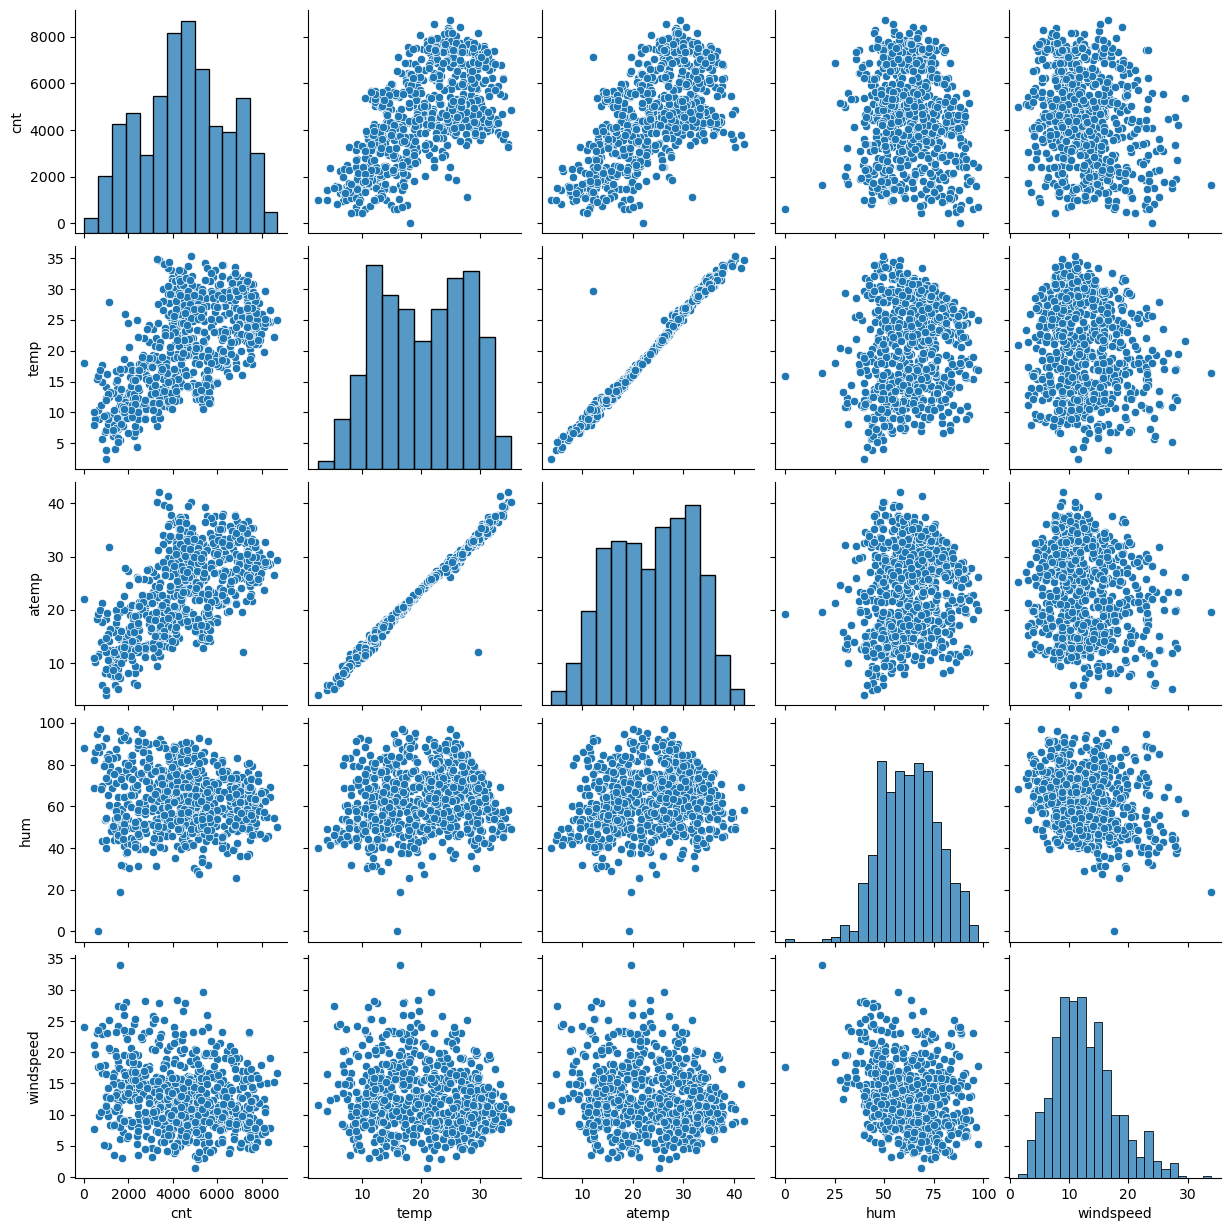

In [14]:
sns.pairplot(data=bike_df1, vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

#### <font color = 'red'> Insights: </font>
By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .  

 <h5> <font color = "orange">Visualising Numeric Variable: Using a boxplot<br><font color="grey"> </font></h5>

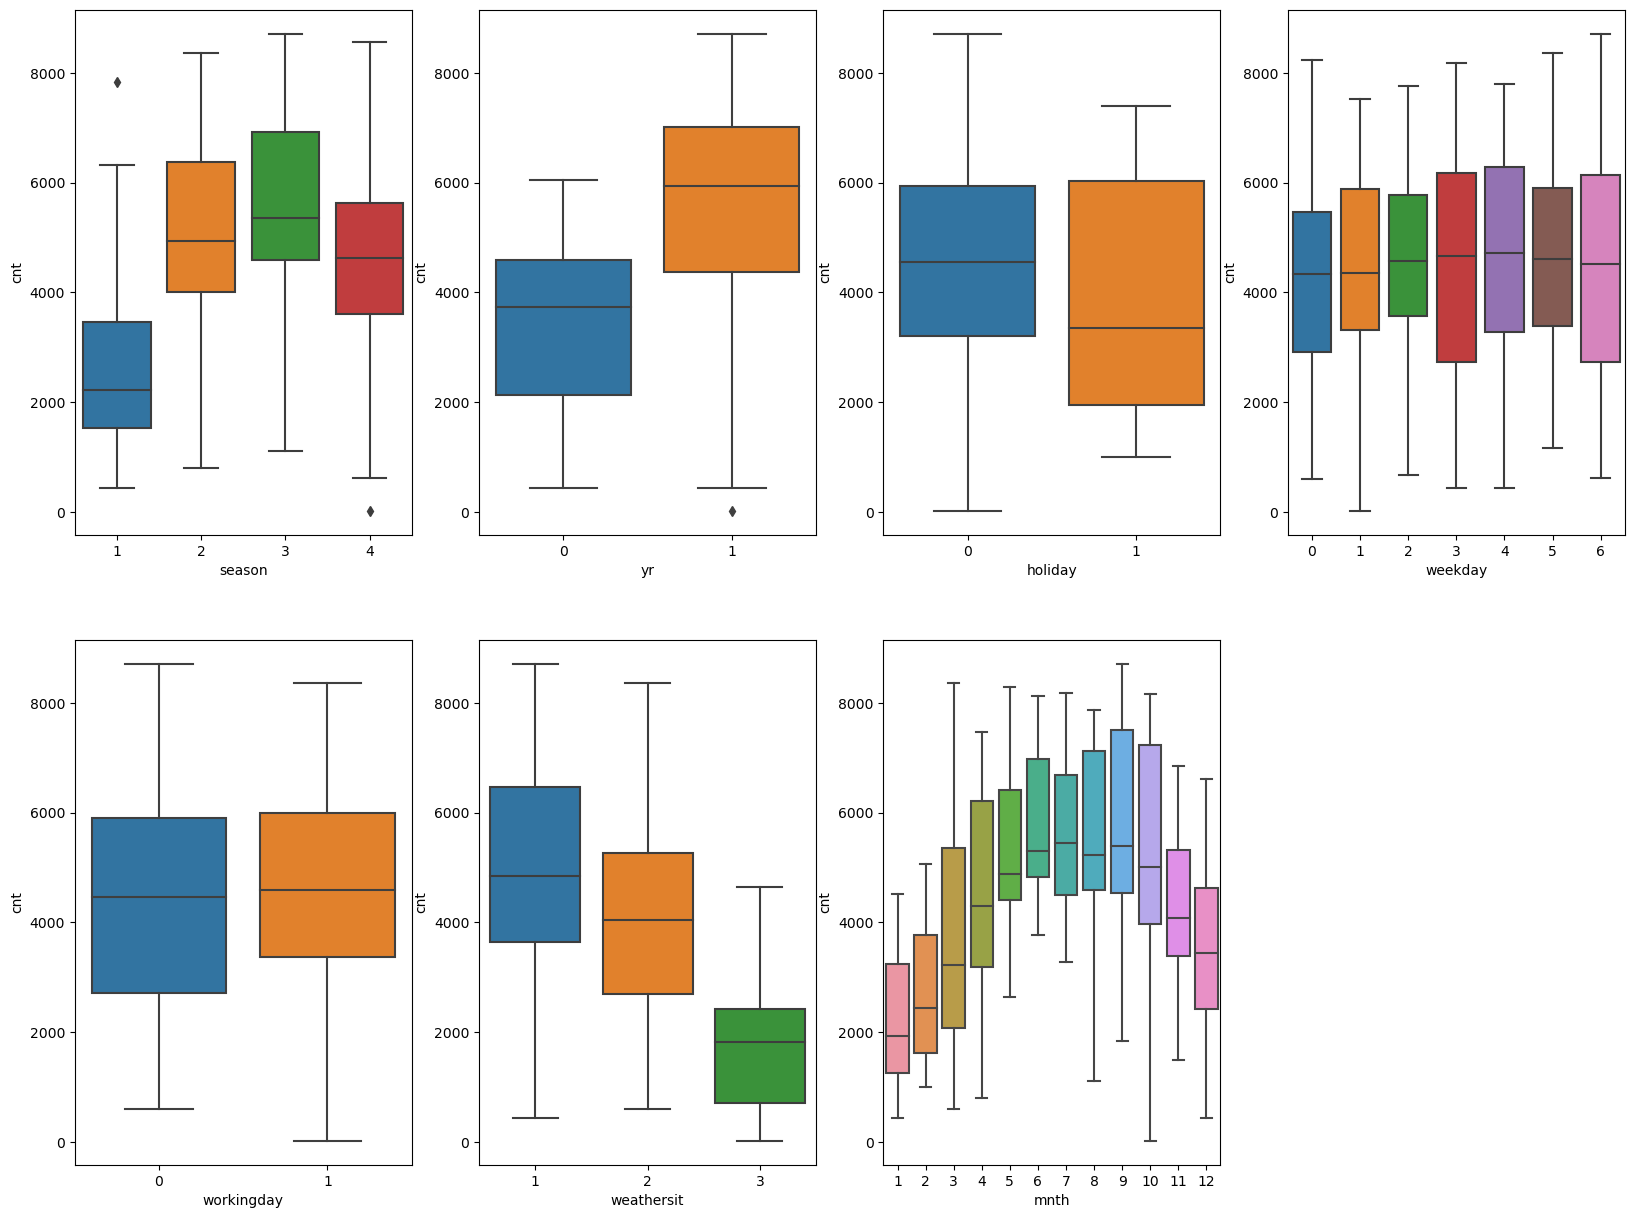

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data= bike_df1)
plt.subplot(2,4,2)
sns.boxplot(x= 'yr' ,y='cnt', data =bike_df1)
plt.subplot(2,4,3)
sns.boxplot(x= 'holiday', y='cnt',data=bike_df1)
plt.subplot(2,4,4)
sns.boxplot(x='weekday', y='cnt', data=bike_df1)
plt.subplot(2,4,5)
sns.boxplot(x='workingday', y='cnt' ,data = bike_df1)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df1)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df1)
plt.show()




#### <font color = 'red'> Insights: </font>
- The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
- For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.
- The year 2019 had a higher count of users as compared to the year 2018.
- The count of rentals is almost even throughout the week.
- There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was Clear, Partly Cloudy.
- The number of rentals peaked in September, whereas they peaked in December. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.
- The count of users is less during the holidays.
- From the "Workingday" boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or not.

 <h5> <font color = "orange">Data Prepration<br></font color="grey"> </font></h5>
         mapping the categorical values to their repective categorical string values(reference data dictionary)

In [16]:
import calendar
bike_df1['mnth'] = bike_df1['mnth'].apply(lambda x: calendar.month_abbr[x])

In [17]:
# Maping seasons
bike_df1.season = bike_df1.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [18]:
# mapping weathersit 
bike_df1_weathersit = bike_df1.weathersit.map({1:'Clear', 2:'Mist & Cloudy',3:'Light snow & Rain',4:'Heavy Snow & Rain'})

In [19]:
# Mapping Weekday 
bike_df1_weekday =bike_df1.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [20]:
bike_df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


 <h5> <font color = "orange">Creating Dummy Variables<br></font color="grey"> </font></h5>
        The variables mnth weekday season weathersit have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.
We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.



In [21]:
# Get the dummy Variables For The Features ''season','mnth','weathersit'' and store it in a new variable - 'dummy'
dummy = bike_df1[['season','mnth','weekday','weathersit']]

In [22]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [23]:
#adding the Dummy variables to the Original dataset 
bike_df1 =pd.concat([dummy,bike_df1],axis=1)

In [24]:
# Deleting the Original columns season.weathersit,weekday,mnth

bike_df1.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)
bike_df1.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season_Spring  730 non-null    uint8  
 1   season_Summer  730 non-null    uint8  
 2   season_Winter  730 non-null    uint8  
 3   mnth_Aug       730 non-null    uint8  
 4   mnth_Dec       730 non-null    uint8  
 5   mnth_Feb       730 non-null    uint8  
 6   mnth_Jan       730 non-null    uint8  
 7   mnth_Jul       730 non-null    uint8  
 8   mnth_Jun       730 non-null    uint8  
 9   mnth_Mar       730 non-null    uint8  
 10  mnth_May       730 non-null    uint8  
 11  mnth_Nov       730 non-null    uint8  
 12  mnth_Oct       730 non-null    uint8  
 13  mnth_Sep       730 non-null    uint8  
 14  yr             730 non-null    int64  
 15  holiday        730 non-null    int64  
 16  workingday     730 non-null    int64  
 17  temp           730 non-null    float64
 18  atemp     

 <h5> <font color = "orange">Splitting the Data into <br></font color="grey"> </font></h5>
 The First Basic Step For Regression is Performance a Train-test split


In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_df1, train_size=0.7, random_state =100)

In [27]:
print(train.shape)
print(test.shape)

(510, 22)
(220, 22)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 <h1> <center> <font color = "orange"> Step 3 : Feature Selection<br><font color="grey"> </font></center></h1>

 Although scaling doesn't impact the linear model in the case of simple linear regression, however while performing multiplwe linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

- Min-Max scaling <br>
- Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
# apply scaler() to all the Columns excep the 'dummy' variables.
num_vars =['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [30]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [31]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.084314,0.080392,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.278131,0.272166,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 <h5> <font color = "orange">Checking the Cofficients to see which variables are Highly correlated<br></font color="grey"> </font></h5>

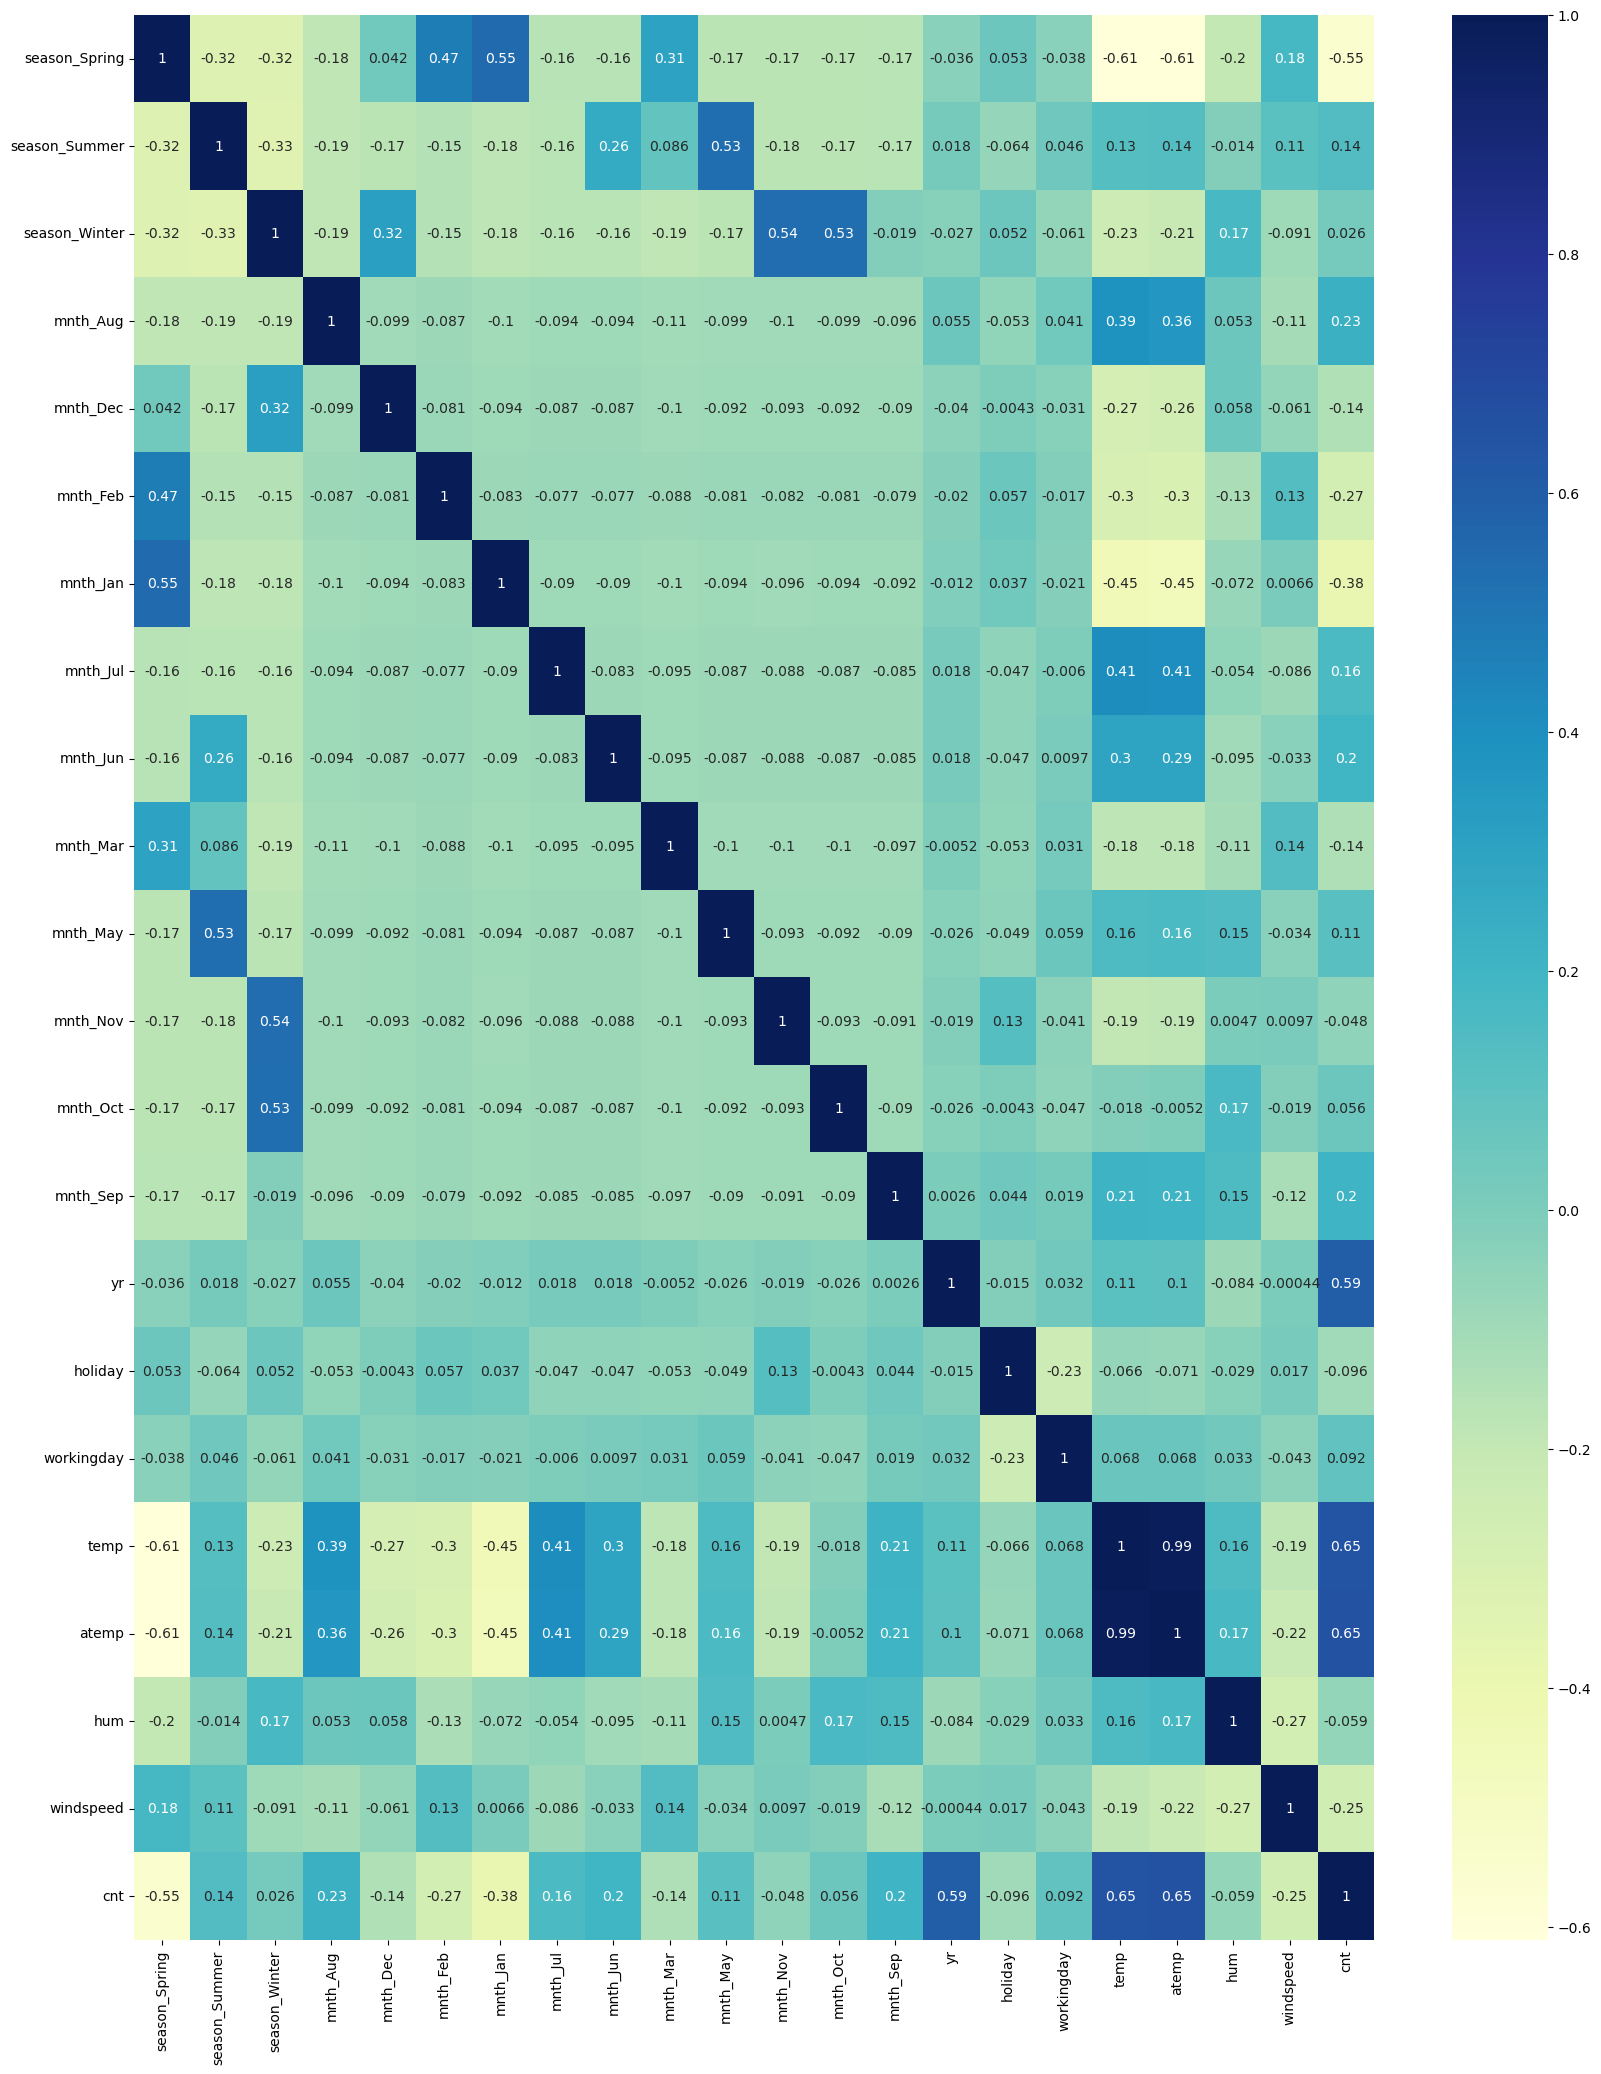

In [32]:
plt.figure(figsize = (20,25))
sns.heatmap(train.corr(), annot =True,cmap ="YlGnBu")
plt.show()

#### <font color = 'red'> Inference: </font>
As can be seen from the map, atemp and temp seems to be correlated to the target variable cnt. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

 <h5> <font color = "orange">Dividing int X and Y sets for the model building<br></font color="grey"> </font></h5>

In [33]:
y_train = train.pop('cnt')
X_train =train

In [34]:
y_train.shape

(510,)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 <h1> <center> <font color = "orange"> Step 4: Building a Linear Model <br><font color="grey"> </font></center></h1>

<b>APPROACH USED :</b> <br>

We will use a mixed approach to build the model.
Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

<b>Feature Selection </b> <br>
We start with 15 variables.
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [35]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [36]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 5),
 ('mnth_May', True, 1),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Sep', 'yr',
       'holiday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['mnth_Dec', 'mnth_Jun', 'mnth_Mar', 'mnth_Nov', 'mnth_Oct',
       'workingday'],
      dtype='object')

 <h5> <font color = "orange">Building model using statesmodel for the detailed ststistics<br></font color="grey"> </font></h5>

In [40]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

 <h5> <font color = "orange">Adding a constant variablr<br></font color="grey"> </font></h5>
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.


In [41]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [42]:
X_train_lm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Sep,yr,holiday,temp,atemp,hum,windspeed
576,1.0,0,0,0,0,0,0,1,0,0,1,0,0.815169,0.766351,0.725633,0.264686
426,1.0,1,0,0,0,0,0,0,0,0,1,0,0.442393,0.438975,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0.245101,0.200348,0.498067,0.663106
482,1.0,0,1,0,0,0,0,0,0,0,1,0,0.395666,0.391735,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,0,0,0,0,0.345824,0.318819,0.751824,0.380981


 <h5> <font color = "orange">Building the First Linear Model using Statsmodels<br></font color="grey"> </font></h5>

In [43]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     147.3
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          2.68e-171
Time:                        14:54:12   Log-Likelihood:                 472.32
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     494   BIC:                            -844.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3619      0.040      9.030      0.000       0.283       0.441
season_Spring    -0.0179      0.029     -0.618      0.537      -0.075       0.039
season_Summer     0.0634      0.025      2.534      0.012       0.014       0.113
season_Winter     0.1135      0.025      4.568      0.000       0.065       0.162
mnth_Aug          0.0310      0.026      1.195      0.233      -0.020       0.082
mnth_Feb         -0.0211      0.022     -0.938      0.349      -0.065       0.023
mnth_Jan         -0.0374      0.022     -1.719      0.086      -0.080       0.005
mnth_Jul         -0.0387      0.027     -1.430      0.153      -0.092       0.014
mnth_May          0.0297      0.019      1.562      0.119      -0.008       0.067
mnth_Sep          0.0979      0.023      4.231      0.000       0.052       0.143
yr                0.2300      0.009     26.200      0.000       0.213       0.247
holiday          -0.0808      0.028     -2.927      0.004      -0.135      -0.027
temp              0.4287      0.147      2.919      0.004       0.140       0.717
atemp             0.1250      0.149      0.837      0.403      -0.168       0.418
hum              -0.3518      0.033    -10.786      0.000      -0.416      -0.288
windspeed        -0.2304      0.028     -8.226      0.000      -0.285      -0.175
==============================================================================
Omnibus:                       95.067   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.414
Skew:                          -0.933   Prob(JB):                     2.29e-53
Kurtosis:                       5.815   Cond. No.                         77.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <font color = 'red'> Inference: </font>
Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and check VIF.

Checking VIF for multicollinearity
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# calculate the VIFs for the New Model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,temp,384.80
12,atemp,369.43
13,hum,20.19
0,season_Spring,6.55
1,season_Summer,5.54
14,windspeed,4.98
2,season_Winter,4.81
3,mnth_Aug,3.08
6,mnth_Jul,2.75
5,mnth_Jan,2.15


 <h5> <font color = "orange">In Genral we want VIF to be less than 5. we WIll Drop feature hum which has Highest VIF of 30.89<br></font color="grey"> </font></h5>

In [46]:
# Droping season_Spring sincs its vif > 5

X_train_ref = X_train_rfe.drop(['hum'], axis=1)

 <h5> <font color = "orange">Model 2<br></font color="grey"> </font></h5>

In [47]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     147.3
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          2.68e-171
Time:                        14:54:13   Log-Likelihood:                 472.32
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     494   BIC:                            -844.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3619      0.040      9.030      0.000       0.283       0.441
season_Spring    -0.0179      0.029     -0.618      0.537      -0.075       0.039
season_Summer     0.0634      0.025      2.534      0.012       0.014       0.113
season_Winter     0.1135      0.025      4.568      0.000       0.065       0.162
mnth_Aug          0.0310      0.026      1.195      0.233      -0.020       0.082
mnth_Feb         -0.0211      0.022     -0.938      0.349      -0.065       0.023
mnth_Jan         -0.0374      0.022     -1.719      0.086      -0.080       0.005
mnth_Jul         -0.0387      0.027     -1.430      0.153      -0.092       0.014
mnth_May          0.0297      0.019      1.562      0.119      -0.008       0.067
mnth_Sep          0.0979      0.023      4.231      0.000       0.052       0.143
yr                0.2300      0.009     26.200      0.000       0.213       0.247
holiday          -0.0808      0.028     -2.927      0.004      -0.135      -0.027
temp              0.4287      0.147      2.919      0.004       0.140       0.717
atemp             0.1250      0.149      0.837      0.403      -0.168       0.418
hum              -0.3518      0.033    -10.786      0.000      -0.416      -0.288
windspeed        -0.2304      0.028     -8.226      0.000      -0.285      -0.175
==============================================================================
Omnibus:                       95.067   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.414
Skew:                          -0.933   Prob(JB):                     2.29e-53
Kurtosis:                       5.815   Cond. No.                         77.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,temp,384.80
12,atemp,369.43
13,hum,20.19
0,season_Spring,6.55
1,season_Summer,5.54
14,windspeed,4.98
2,season_Winter,4.81
3,mnth_Aug,3.08
6,mnth_Jul,2.75
5,mnth_Jan,2.15


#### <font color = 'red'> Inference: </font>
Now as you can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise lm_2 as the final model to proceed with the future prdeictions.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 <h1> <center> <font color = "orange"> Step 5: Residual Analysis Of the train data <br><font color="grey"> </font></center></h1>

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [49]:
y_train_pred = lm_2.predict(X_train_lm)

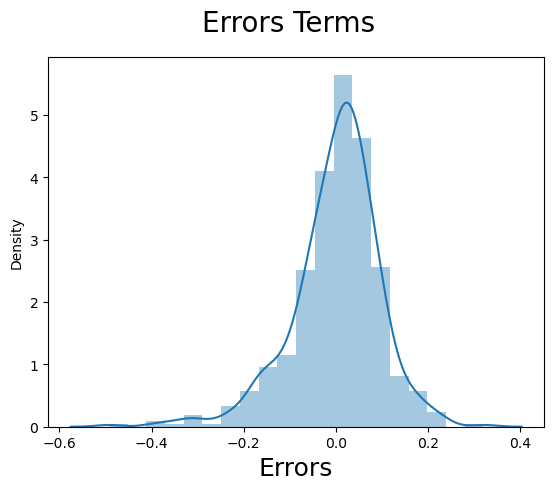

In [50]:
# plot the Histogram of the Error Term 
fig = plt.figure()
sns.distplot((y_train - y_train_pred),bins =20)
fig.suptitle('Errors Terms', fontsize = 20)
plt.xlabel("Errors", fontsize =18)
plt.show()

#### <font color = 'red'> Inference: </font>
We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

 <h5> <font color = "orange">In Genral we want VIF to be less than 5. we WIll Drop feature hum which has Highest VIF of 30.89<br></font color="grey"> </font></h5>

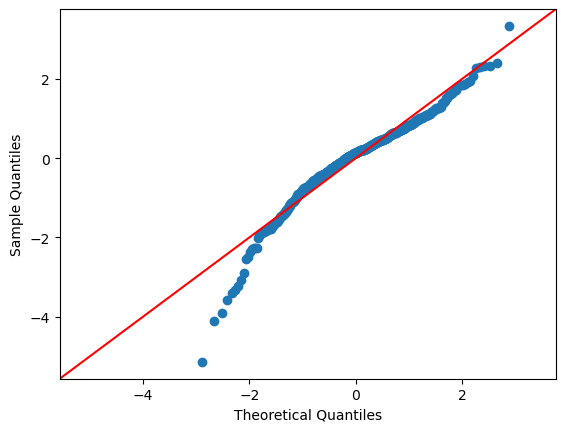

In [51]:
# plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred),fit=True, line='45')
plt.show()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 <h1> <center> <font color = "orange"> Step 6: Model Evaluation <br><font color="grey"> </font></center></h1>

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Applying the scaling on the test sets

In [52]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [53]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.086364,0.086364,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.281541,0.281541,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


<h5> <font color = "orange">Dividing into X_test and y_test<br></font color="grey"> </font></h5>

In [54]:
y_test = test.pop('cnt')
X_test = test

In [55]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_2.predict(X_test)


<h5> <font color = "orange">Calculating the r-squared<br></font color="grey"> </font></h5>
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [56]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8172613191420305
r2_score of test dataset 0.8100176025388766


#### <font color = 'red'> Inference: </font>
We can see that the r_squared on the test set is 0.813 and the r-squared on the trained set 0.839 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

<h5> <font color = "orange">Plotting the graph for actual versus predicted values<br></font color="grey"> </font></h5>

Text(0, 0.5, 'y_pred')

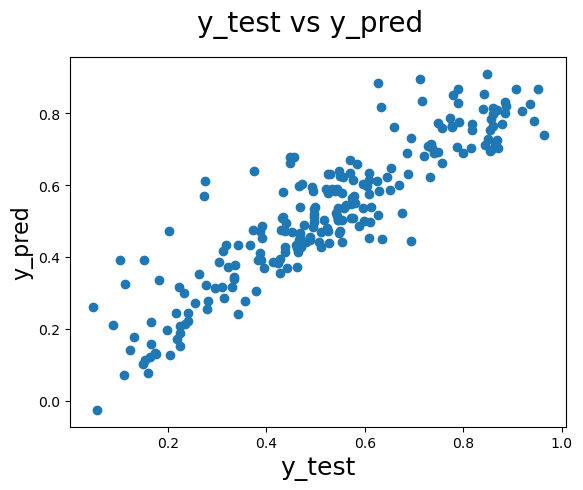

In [57]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

#### <font color = 'red'> Inference: </font>
We can colude that the final model fit isn't by chance, and has descent predictive power.



<h5> <font color = "orange">Getting the variable names and the coefficient values for the final equation of the best fitted line<br></font color="grey"> </font></h5>

In [58]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,16))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param


,Variables,Coefficient value
index,,
12,temp,0.428709
0,const,0.361945
10,yr,0.230017
13,atemp,0.124988
3,season_Winter,0.113538
9,mnth_Sep,0.097948
2,season_Summer,0.063375
4,mnth_Aug,0.030984
8,mnth_May,0.029674


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 <h1> <center> <font color = "orange"> Step 7: Conclusion  <br><font color="grey"> </font></center></h1>

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### <font color = 'red'> Final Conclusion: </font>
We can colude that the final model fit isn't by chance, and has descent predictive power.

$ cnt = 0.245 + 0.4387 \times  temp + 0.2342  \times  yr + 0.0868 \times season Winter + 0.0687 \times mnth Sept + 0.0348 \times season Summer - 0.0395 \times mnth Nov - 0.0428 \times mnth Dec - 0.0500 \times mnth Jan - 0.0500 \times mnth Jul - 0.0712 \times season Spring - 0.0800 \times weathersit Mist Cloudy - 0.0917 \times holiday - 0.1584 \times windspeed - 0.2917 \times weathersit Light Snow Rain $

##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
##### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.428709)
 - hum (-0.351819)
 - year (0.230017)

Hence, it can be clearly concluded that the variables `temperature` , `hum` and `year`  are significant in predicting the demand for shared bikes .

#### <font color = 'red'> Final Recommendation For The Company : </font>


- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
- Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.